# Housing Prices Predictions

## 1. Data Preparation

In [43]:
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [44]:
np.random.seed(88)

In [45]:
plt.rc('font', size=12)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=12)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)
plt.rc('figure', titlesize=16)
plt.rcParams['figure.figsize'] = [10, 6]

Read and stratify on income classes.

In [46]:
housing = pd.read_csv("data/chap2/housing.csv")

In [57]:
housing.isna().sum()[housing.isna().sum() > 0]  

total_bedrooms    207
dtype: int64

In [47]:
housing["income_class"] = pd.cut(housing["median_income"], bins=[0., 1.5, 3.0, 4.5, 6., np.inf], labels=[1, 2, 3, 4, 5])

In [48]:
housing_train, housing_test = sklearn.model_selection.train_test_split(housing, test_size=0.2, random_state=88, stratify=housing["income_class"])

In [49]:
housing_train.drop("income_class", axis=1, inplace=True)
housing_test.drop("income_class", axis=1, inplace=True)

In [50]:
housing_train.shape, housing_test.shape

((16512, 10), (4128, 10))

In [52]:
housing_train_labels = housing_train["median_house_value"]
housing_train.drop(columns=["median_house_value"], inplace=True)

In [53]:
housing_train.shape, housing_train_labels.shape

((16512, 9), (16512,))

### 1.1 Missing Values (Numerical)

We can drop the rows, the whole columns or impute missing values (0, median, mean, etc.)

The benefit to creating an Imputer object is that it will store the median for each column, so we can preprocess the test/validation sets with the same values.

In [60]:
imputer = sklearn.impute.SimpleImputer(strategy="median")
imputer

SimpleImputer(strategy='median')

In [61]:
housing_train_num = housing_train.select_dtypes(include=[np.number])

In [62]:
housing_train_num.isna().sum()[housing_train_num.isna().sum() > 0]

total_bedrooms    162
dtype: int64

We can `fit_tranform` directly or fit and then transform.

In [66]:
housing_train_num = imputer.fit_transform(housing_train_num)

In [70]:
pd.DataFrame(housing_train_num, columns=housing_train.select_dtypes(include=[np.number]).columns).isna().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
dtype: int64

In [71]:
housing_train_num = housing_train.select_dtypes(include=[np.number])

This is basically "training" the imputer.

In [73]:
imputer.fit(housing_train_num)

SimpleImputer(strategy='median')

In [74]:
imputer.statistics_

array([-118.49   ,   34.25   ,   29.     , 2138.     ,  435.     ,
       1167.     ,  410.     ,    3.52955])

In [76]:
housing_train_num.median().values

array([-118.49   ,   34.25   ,   29.     , 2138.     ,  435.     ,
       1167.     ,  410.     ,    3.52955])

In [77]:
X = imputer.transform(housing_train_num)

In [78]:
X = pd.DataFrame(X, columns=housing_train_num.columns, index=housing_train_num.index)
X

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
20180,-121.33,38.77,3.0,20214.0,3559.0,8361.0,3112.0,4.2259
16716,-121.59,39.78,16.0,2754.0,570.0,1063.0,543.0,1.4048
18333,-121.18,37.99,31.0,2450.0,559.0,1459.0,478.0,2.4674
20161,-122.44,37.75,28.0,4930.0,1381.0,2232.0,1321.0,4.3232
5051,-121.43,37.74,52.0,994.0,258.0,623.0,264.0,1.7250
...,...,...,...,...,...,...,...,...
7195,-118.24,33.89,32.0,1132.0,266.0,1211.0,279.0,2.1838
10861,-121.36,38.64,24.0,6540.0,1008.0,2667.0,1031.0,5.5632
577,-121.27,37.96,43.0,1624.0,448.0,1805.0,440.0,1.4250
3430,-117.40,33.96,51.0,1806.0,322.0,709.0,298.0,3.5750


### 1.2 Categorical Variables

In [80]:
housing.dtypes

longitude              float64
latitude               float64
housing_median_age     float64
total_rooms            float64
total_bedrooms         float64
population             float64
households             float64
median_income          float64
median_house_value     float64
ocean_proximity         object
income_class          category
dtype: object

In [81]:
housing_train_cat = housing_train.select_dtypes(include=[object])

In [83]:
housing_train_cat.value_counts()

ocean_proximity
<1H OCEAN          7317
INLAND             5217
NEAR OCEAN         2147
NEAR BAY           1826
ISLAND                5
Name: count, dtype: int64

In [85]:
sklearn.preprocessing.OrdinalEncoder??

Init signature:
sklearn.preprocessing.OrdinalEncoder(
    *,
    categories='auto',
    dtype=<class 'numpy.float64'>,
    handle_unknown='error',
    unknown_value=None,
    encoded_missing_value=nan,
    min_frequency=None,
    max_categories=None,
)
Source:        
class OrdinalEncoder(OneToOneFeatureMixin, _BaseEncoder):
    """
    Encode categorical features as an integer array.

    The input to this transformer should be an array-like of integers or
    strings, denoting the values taken on by categorical (discrete) features.
    The features are converted to ordinal integers. This results in
    a single column of integers (0 to n_categories - 1) per feature.

    Read more in the :ref:`User Guide <preprocessing_categorical_features>`.
    For a comparison of different encoders, refer to:
    :ref:`sphx_glr_auto_examples_preprocessing_plot_target_encoder.py`.

    .. versionadded:: 0.20

    Parameters
    ----------
    categories : 'auto' or a list of array-like, default='au

In [86]:
ordinal_encoder = sklearn.preprocessing.OrdinalEncoder()
ordinal_encoder

OrdinalEncoder()

In [87]:
ordinal_encoder.fit(housing_train_cat)

OrdinalEncoder()

In [90]:
ordinal_encoder.feature_names_in_

array(['ocean_proximity'], dtype=object)

Representing categorical values with numbers can cause problems as some models will assume that nearby values are more similar than distant ones. That's fine with ordered categories but it's not the case here.

In [88]:
ordinal_encoder.categories_

[array(['<1H OCEAN', 'INLAND', 'ISLAND', 'NEAR BAY', 'NEAR OCEAN'],
       dtype=object)]

In [99]:
housing_train_cat_encoded = ordinal_encoder.transform(housing_train_cat)

In [100]:
housing_train_cat_encoded[:10]

array([[1.],
       [1.],
       [1.],
       [3.],
       [1.],
       [4.],
       [4.],
       [1.],
       [1.],
       [1.]])

To fix the aforementioned issue, we can create a binary column for each category (dummy attributes).

In [102]:
one_hot_encoder = sklearn.preprocessing.OneHotEncoder()
one_hot_encoder

OneHotEncoder()

In [103]:
housing_train_cat_1hot = one_hot_encoder.fit_transform(housing_train_cat)

In [112]:
type(housing_train_cat_1hot)

scipy.sparse._csr.csr_matrix

In [113]:
housing_train_cat_1hot

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 16512 stored elements and shape (16512, 5)>

In [116]:
print(housing_train_cat_1hot)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 16512 stored elements and shape (16512, 5)>
  Coords	Values
  (0, 1)	1.0
  (1, 1)	1.0
  (2, 1)	1.0
  (3, 3)	1.0
  (4, 1)	1.0
  (5, 4)	1.0
  (6, 4)	1.0
  (7, 1)	1.0
  (8, 1)	1.0
  (9, 1)	1.0
  (10, 0)	1.0
  (11, 0)	1.0
  (12, 0)	1.0
  (13, 1)	1.0
  (14, 0)	1.0
  (15, 1)	1.0
  (16, 1)	1.0
  (17, 0)	1.0
  (18, 0)	1.0
  (19, 0)	1.0
  (20, 0)	1.0
  (21, 0)	1.0
  (22, 4)	1.0
  (23, 1)	1.0
  (24, 0)	1.0
  :	:
  (16487, 0)	1.0
  (16488, 3)	1.0
  (16489, 0)	1.0
  (16490, 1)	1.0
  (16491, 3)	1.0
  (16492, 3)	1.0
  (16493, 0)	1.0
  (16494, 0)	1.0
  (16495, 0)	1.0
  (16496, 1)	1.0
  (16497, 4)	1.0
  (16498, 4)	1.0
  (16499, 0)	1.0
  (16500, 0)	1.0
  (16501, 0)	1.0
  (16502, 3)	1.0
  (16503, 0)	1.0
  (16504, 1)	1.0
  (16505, 4)	1.0
  (16506, 1)	1.0
  (16507, 0)	1.0
  (16508, 1)	1.0
  (16509, 1)	1.0
  (16510, 1)	1.0
  (16511, 0)	1.0


We can convert the SciPy sparse matrix to a normal (dense) NumPy 2D array. Or simply call the OneHotEncoder constructor with `sparse=False`.

In [114]:
housing_train_cat_1hot.toarray()

array([[0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       ...,
       [0., 1., 0., 0., 0.],
       [0., 1., 0., 0., 0.],
       [1., 0., 0., 0., 0.]], shape=(16512, 5))

Pandas provides a `get_dummies` function that gets the job done as well, but OneHotEncoder stores the categories so we can preprocess the train/validation sets equally.

In [117]:
pd.get_dummies(housing_train_cat)

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
20180,False,True,False,False,False
16716,False,True,False,False,False
18333,False,True,False,False,False
20161,False,False,False,True,False
5051,False,True,False,False,False
...,...,...,...,...,...
7195,True,False,False,False,False
10861,False,True,False,False,False
577,False,True,False,False,False
3430,False,True,False,False,False


In [118]:
df_test = pd.DataFrame({"ocean_proximity": ["INLAND", "NEAR BAY"]})
pd.get_dummies(df_test)

,ocean_proximity_INLAND,ocean_proximity_NEAR BAY
0,True,False
1,False,True


In [124]:
print(one_hot_encoder.transform(df_test))

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 2 stored elements and shape (2, 5)>
  Coords	Values
  (0, 1)	1.0
  (1, 3)	1.0


In [126]:
one_hot_encoder.transform(df_test).toarray()

array([[0., 1., 0., 0., 0.],
       [0., 0., 0., 1., 0.]])

Notice shape (2, 5), yet `df_test` only has 2 categories, that's why we use OneHotEncoder.

Moreover, OneHotEncoder will detect unknown categories and act according to the `handle_unknown` hyperparameter.

In [128]:
# Zero for unknown categories
one_hot_encoder.handle_unknown = "ignore"

### 1.3 Feature Scaling

With very few exceptions, ML algorithms don't perform well when attributes have very different scales.

A MinMaxScaler transforms all features so that they end up ranging between 0 and 1. That range can be changed using the `feature_range` hyperparameter. This is also known as normalization.

The transformation is given by:

    X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))
    X_scaled = X_std * (max - min) + min

where min, max = feature_range.

In [132]:
min_max_scaler = sklearn.preprocessing.MinMaxScaler()
min_max_scaler

MinMaxScaler()

In [131]:
min_max_scaler.feature_range

(0, 1)

In [133]:
min_max_scaler = sklearn.preprocessing.MinMaxScaler(feature_range=(-1, 1))
min_max_scaler

MinMaxScaler(feature_range=(-1, 1))

In [134]:
min_max_scaler.feature_range

(-1, 1)

In [135]:
housing_train_num_scaled = min_max_scaler.fit_transform(housing_train_num)

In [138]:
min_max_scaler.get_feature_names_out()

array(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype=object)

In [139]:
pd.DataFrame(housing_train_num_scaled, columns=min_max_scaler.get_feature_names_out(), index=housing_train_num.index)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
20180,-0.398406,0.323404,-0.921569,0.028130,0.104144,-0.531489,0.023026,-0.486076
16716,-0.450199,0.538298,-0.411765,-0.860013,-0.823685,-0.940581,-0.822039,-0.875188
18333,-0.368526,0.157447,0.176471,-0.875477,-0.827099,-0.918383,-0.843421,-0.728624
20161,-0.619522,0.106383,0.058824,-0.749326,-0.571939,-0.875053,-0.566118,-0.472656
5051,-0.418327,0.104255,1.000000,-0.949540,-0.920534,-0.965246,-0.913816,-0.831023
...,...,...,...,...,...,...,...,...
7195,0.217131,-0.714894,0.215686,-0.942520,-0.918051,-0.932285,-0.908882,-0.767741
10861,-0.404382,0.295745,-0.098039,-0.667430,-0.687723,-0.850668,-0.661513,-0.301623
577,-0.386454,0.151064,0.647059,-0.917493,-0.861555,-0.898988,-0.855921,-0.872402
3430,0.384462,-0.700000,0.960784,-0.908235,-0.900667,-0.960425,-0.902632,-0.575854


In [140]:
pd.DataFrame(housing_train_num_scaled, columns=min_max_scaler.get_feature_names_out())

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
0,-0.398406,0.323404,-0.921569,0.028130,0.104144,-0.531489,0.023026,-0.486076
1,-0.450199,0.538298,-0.411765,-0.860013,-0.823685,-0.940581,-0.822039,-0.875188
2,-0.368526,0.157447,0.176471,-0.875477,-0.827099,-0.918383,-0.843421,-0.728624
3,-0.619522,0.106383,0.058824,-0.749326,-0.571939,-0.875053,-0.566118,-0.472656
4,-0.418327,0.104255,1.000000,-0.949540,-0.920534,-0.965246,-0.913816,-0.831023
...,...,...,...,...,...,...,...,...
16507,0.217131,-0.714894,0.215686,-0.942520,-0.918051,-0.932285,-0.908882,-0.767741
16508,-0.404382,0.295745,-0.098039,-0.667430,-0.687723,-0.850668,-0.661513,-0.301623
16509,-0.386454,0.151064,0.647059,-0.917493,-0.861555,-0.898988,-0.855921,-0.872402
16510,0.384462,-0.700000,0.960784,-0.908235,-0.900667,-0.960425,-0.902632,-0.575854


In [141]:
pd.DataFrame(housing_train_num_scaled, columns=min_max_scaler.get_feature_names_out()).describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,16512.000000,16512.000000,16512.000000,16512.000000,16350.000000,16512.000000,16512.000000,16512.000000
mean,-0.048155,-0.343762,0.081989,-0.865619,-0.833070,-0.920101,-0.835856,-0.535515
std,0.399700,0.455509,0.492647,0.111945,0.131744,0.064203,0.126985,0.261261
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,-0.492032,-0.706383,-0.333333,-0.926293,-0.908738,-0.956109,-0.908882,-0.715507
50%,0.167331,-0.638298,0.098039,-0.891347,-0.865591,-0.934752,-0.865789,-0.582123
75%,0.262948,0.100000,0.411765,-0.839361,-0.798851,-0.903304,-0.800987,-0.415208
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


While normalization can be affected by outliers, standardization is not. It basically subtracts the mean value and then divides by the standard deviation so that the resulting distribution has unit variance.

In [143]:
standard_scaler = sklearn.preprocessing.StandardScaler()
standard_scaler

StandardScaler()

In [144]:
housing_train_num_scaled = standard_scaler.fit_transform(housing_train_num)

In [146]:
pd.DataFrame(housing_train_num_scaled, columns=housing_train_num.columns, index=housing_train_num.index)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
20180,-0.876313,1.464706,-2.037136,7.984060,7.114097,6.053085,6.763859,0.189237
16716,-1.005896,1.936486,-1.002278,0.050077,0.071241,-0.319011,0.108807,-1.300167
18333,-0.801553,1.100361,0.191789,-0.088063,0.045323,0.026748,-0.059577,-0.739166
20161,-1.429533,0.988255,-0.047024,1.038871,1.982167,0.701677,2.124234,0.240606
5051,-0.926152,0.983584,1.863483,-0.749683,-0.663911,-0.703188,-0.613948,-1.131117
...,...,...,...,...,...,...,...,...
7195,0.663734,-0.814787,0.271394,-0.686974,-0.645061,-0.189788,-0.575091,-0.888893
10861,-0.891264,1.403982,-0.365442,1.770470,1.103283,1.081488,1.372982,0.895266
577,-0.846409,1.086348,1.147043,-0.463405,-0.216222,0.328851,-0.158017,-1.289502
3430,1.082388,-0.782089,1.783879,-0.380702,-0.513111,-0.628099,-0.525871,-0.154407


In [147]:
pd.DataFrame(housing_train_num_scaled, columns=housing_train_num.columns, index=housing_train_num.index).describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income
count,1.651200e+04,1.651200e+04,1.651200e+04,1.651200e+04,1.635000e+04,1.651200e+04,1.651200e+04,1.651200e+04
mean,-8.477284e-16,3.427491e-15,-6.153562e-17,-1.041372e-16,8.403743e-17,6.282657e-17,1.834235e-17,1.973551e-16
std,1.000030e+00,1.000030e+00,1.000030e+00,1.000030e+00,1.000031e+00,1.000030e+00,1.000030e+00,1.000030e+00
min,-2.381472e+00,-1.440713e+00,-2.196345e+00,-1.200456e+00,-1.267113e+00,-1.244528e+00,-1.292665e+00,-1.777910e+00
25%,-1.110559e+00,-7.961023e-01,-8.430688e-01,-5.420177e-01,-5.743733e-01,-5.608676e-01,-5.750906e-01,-6.889577e-01
50%,5.391351e-01,-6.466274e-01,3.258037e-02,-2.298387e-01,-2.468534e-01,-2.282054e-01,-2.357322e-01,-1.784024e-01
75%,7.783657e-01,9.742414e-01,6.694161e-01,2.345674e-01,2.597421e-01,2.616200e-01,2.746007e-01,4.604979e-01
max,2.622435e+00,2.950113e+00,1.863483e+00,1.666600e+01,1.391426e+01,2.990784e+01,1.445771e+01,5.877490e+00


Scaling doesn't really work well with long-tailed distributions, as it pushes most values into a very small range. We can apply transformations such as the square root or the logarithm.

<Axes: >

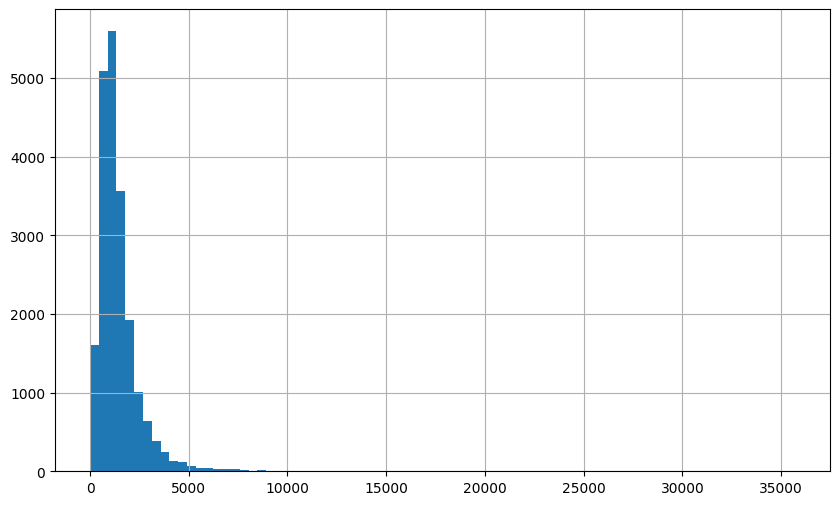

In [151]:
housing["population"].hist(bins=80)

<Axes: >

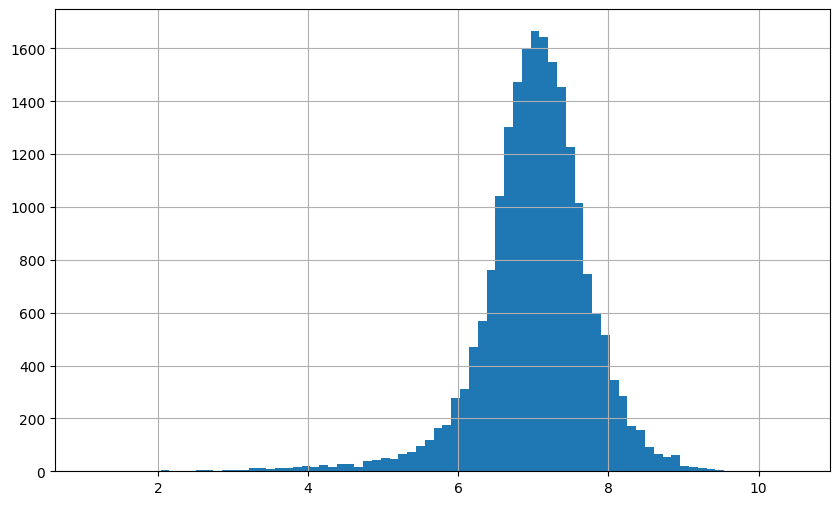

In [ ]:
housing["population"].apply(np.log).hist(bins=80)

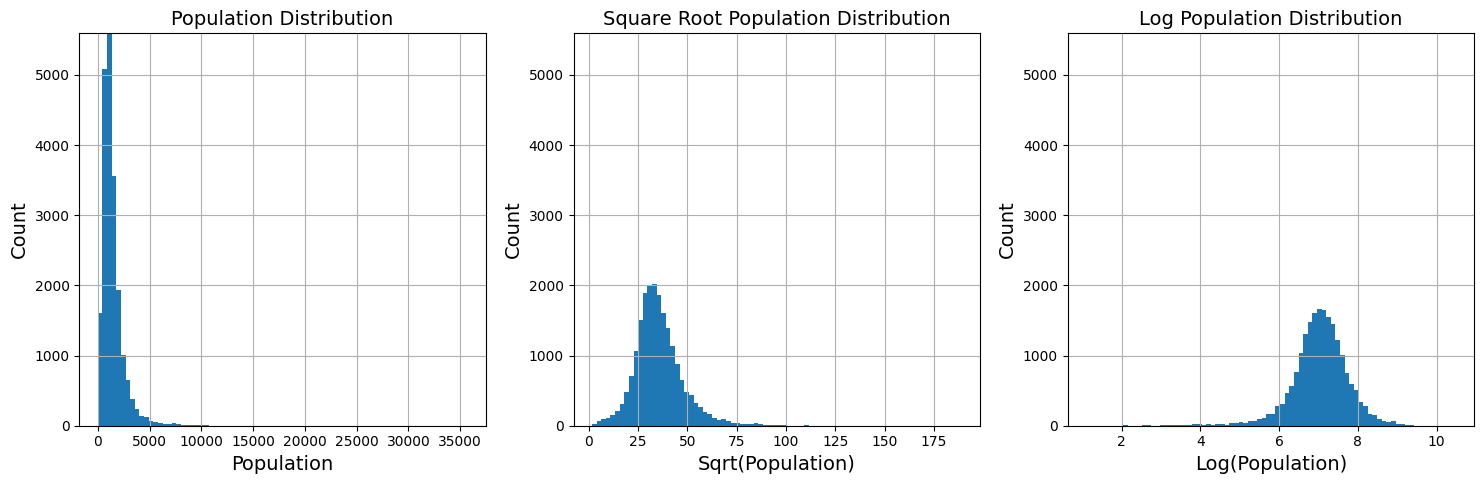

In [156]:
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 5))

# Get the max count to set consistent y-axis
max_count = max(
    np.histogram(housing["population"], bins=80)[0].max(),
    np.histogram(housing["population"].apply(np.sqrt), bins=80)[0].max(),
    np.histogram(housing["population"].apply(np.log), bins=80)[0].max()
)

housing["population"].hist(bins=80, ax=ax1)
ax1.set_title("Population Distribution")
ax1.set_xlabel("Population")
ax1.set_ylabel("Count")
ax1.set_ylim(0, max_count)

housing["population"].apply(np.sqrt).hist(bins=80, ax=ax2)
ax2.set_title("Square Root Population Distribution")
ax2.set_xlabel("Sqrt(Population)")
ax2.set_ylabel("Count")
ax2.set_ylim(0, max_count)

housing["population"].apply(np.log).hist(bins=80, ax=ax3)
ax3.set_title("Log Population Distribution") 
ax3.set_xlabel("Log(Population)")
ax3.set_ylabel("Count")
ax3.set_ylim(0, max_count)

plt.tight_layout()

Another approach is bucketizing which consists in dividing the range of values into bins and then substituting the value with the bin it belongs to. This can be done using the`KBinsDiscretizer` class from scikit-learn.

Or we can just replace each value with its percentile, that way we get a uniform distribution.

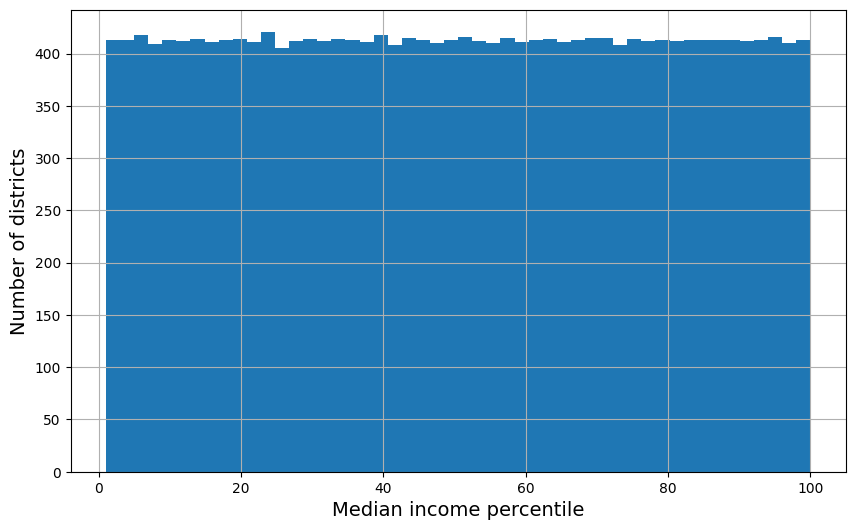

In [158]:
percentiles = [np.percentile(housing["median_income"], p)
               for p in range(1, 100)]

flattened_median_income = pd.cut(housing["median_income"],
                                 bins=[-np.inf] + percentiles + [np.inf],
                                 labels=range(1, 100 + 1))

flattened_median_income.hist(bins=50)
plt.xlabel("Median income percentile")
plt.ylabel("Number of districts")
plt.show()